# Projet IT4A - Automne 2024
### Etude de la complexité d'algorithmes de tri
##### GOUILLARDON Nicolas - DAVAL Nicolas

In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys
import math
from Fonctions_DAVAL_GOUILLARDON import *

In [5]:
sys.setrecursionlimit(10000)

# <span style="color:red">Brève présentation de la théorie de la complexité</span>.

L'étude des algorithmes de tri est une composante fondamentale de l'informatique, tant par sa pertinence théorique que pratique. La complexité d'un algorithme, définie par le nombre d'opérations élémentaires nécessaires pour traiter des données, est directement liée à la quantité de ressources qu'il mobilise. Ces ressources incluent non seulement le temps de calcul (mesuré en fonction du nombre d'instructions exécutées), mais aussi l'espace mémoire et, dans une perspective plus moderne, la consommation énergétique.

## Historique

La théorie de la complexité étudie les ressources nécessaires pour résoudre des problèmes computationnels. Son histoire remonte aux débuts de l'informatique théorique dans les années 60, lorsque des chercheurs ont commencé à formaliser la notion de calculabilité et à classer les problèmes en fonction de leur difficulté.

Au début, des pionniers comme Alan Turing ont posé les bases avec le concept de la machine de Turing, qui a permis de définir ce qui peut être calculé. Dans les années 70, des chercheurs tels que Stephen Cook ont introduit la notion de NP-complet, établissant un lien crucial entre différents problèmes et posant la question de savoir si P (problèmes résolubles en temps polynomial) est égal à NP (problèmes dont la solution peut être vérifiée en temps polynomial).

Le théorème de Cook en 1971 a prouvé que certains problèmes, comme le problème du voyageur de commerce, sont NP-complets. Cette classification des problèmes a motivé des travaux sur des algorithmes approximatifs et heuristiques pour traiter des problèmes difficiles.


## Application aux algorithmes de Tri

Pour déterminer la complexité d'un algorithme de tri, on analyse le nombre d'opérations nécessaires pour trier une liste d'éléments en fonction de la taille de la liste, généralement notée $n$.

**On procède par étapes :**

 - **Analyser les opérations de base :** Identifier les opérations fondamentales (comparaisons, échanges) effectuées par l'algorithme.

 - **Cas moyen, meilleur et pire cas :** Évaluer le nombre d'opérations dans différents scénarios :

 - **Meilleur cas :** La situation où l'algorithme effectue le moins d'opérations.

 - **Pire cas :** La situation où l'algorithme effectue le plus d'opérations.

 - **Cas moyen :** La situation moyenne, souvent calculée en utilisant des probabilités.

 - **Exprimer en fonction de $n$ :** Formuler le nombre d'opérations en fonction de la taille de la liste $n$.

 - **Notation grand O :** Utiliser la notation grand O pour exprimer la complexité asymptotique, qui donne une idée de la croissance du nombre d'opérations en fonction de $n$.

## Définition de la notation Grand O

La notation de Landau (Grand O) exprime une borne supérieure sur le comportement asymptotique d'une fonction. Si une fonction $( f(n) )$ est $( O(g(n)) )$.*

Cela signifie qu'il existe des constantes positives $( c )$ et $( n_0 )$ telles que pour tout $( n \geq n_0 ), ( f(n) \leq c \cdot g(n) ). $

Formellement : $[ f(n) = O(g(n)) \iff \exists c > 0, \exists n_0 > 0, \forall n \geq n_0, f(n) \leq c \cdot g(n) ]$


## Les différentes données

Pour comparer les algorithmes de tri, il est intéressant de voir leur rapidité en fonction des données d'entrée. Nous avons donc ajouté des tableaux à moitié triés pour évaluer l'efficacité des algorithmes de type "divide and conquer" dans ces cas particuliers. De plus, des listes avec doublons sont incluses pour illustrer l'importance de réduire le nombre de comparaisons.

**Tableaux :**

| Type de tableau          | Description                                      |
|--------------------------|--------------------------------------------------|
| Aléatoires               | Les éléments sont disposés de manière aléatoire. |
| Triés                    | Les éléments sont déjà triés dans l'ordre croissant. |
| Inversés                 | Les éléments sont triés dans l'ordre décroissant. |
| Partiellement triés      | La moitié des éléments est triée.                |
| Avec doublons            | Contient des éléments en double.                 |

*Voici un exemple :*

In [6]:
longueur = 15
i = 1
for h in ['aléatoire','trié','inversé','partiellement trié','avec doublons']:
    print(h, create_data(1,longueur)[i])
    i += 1

aléatoire [[0, 3, 14, 11, 1, 12, 9, 2, 5, 10, 6, 4, 8, 7, 13]]
trié [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
inversé [[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]]
partiellement trié [[9, 2, 4, 6, 13, 1, 11, 0, 3, 5, 7, 8, 10, 12, 14]]
avec doublons [[10, 2, 9, 3, 14, 1, 14, 3, 14, 7, 2, 3, 5, 4, 11]]


## Implémentation des algorithmes de tri
À partir des informations données en consigne à cette analyse ainsi que des ressources en ligne, nous avons tout d'abord implémenté les algorithmes de tri sous forme de fonction Python. Ces algorithmes ont ensuite été modifiés pour qu'ils puissent traquer le nombre de comparaisons et le nombre de permutations, afin de pouvoir exploiter ces données lors de l'analyse de la complexité.

#### Bubble sort (Tri à bulles)

In [7]:
def bubble_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            cpt_comp += 1
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
                flag = 1
                cpt_swap += 1
        if flag == 0:
            break
    return A, cpt_comp, cpt_swap

#### Selection sort (Tri par sélection)

In [8]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if A[j] < A[min_idx]:
                min_idx = j
        if min_idx != i:
            t = A[i]
            A[i] = A[min_idx]
            A[min_idx] = t
    return A

def selection_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            cpt_comp += 1  # comparaison entre A[j] et A[min_idx]
            if A[j] < A[min_idx]:
                min_idx = j
        if min_idx != i:
            A[i], A[min_idx] = A[min_idx], A[i]
            cpt_swap += 1  # permutation
    return A, cpt_comp, cpt_swap


#### Insertion sort (Tri par insertion)

In [9]:
def insertion_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    for i in range(1, n):
        x = A[i]
        j = i - 1
        while j >= 0 and A[j] > x:
            cpt_comp += 1  # comparaison entre A[j] et x
            A[j + 1] = A[j]  # décalage à droite
            j -= 1
            cpt_swap += 1  # décalage est considéré comme un "swap"
        A[j + 1] = x
        if j >= 0:  # Pour compter la dernière comparaison
            cpt_comp += 1
    return A, cpt_comp, cpt_swap


#### Heap sort (Tri par tas)

In [10]:
def heapify_stats(A, n, i, cpt_comp, cpt_swap):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n:
        cpt_comp += 1  # comparaison entre A[left] et A[largest]
        if A[left] > A[largest]:
            largest = left

    if right < n:
        cpt_comp += 1  # comparaison entre A[right] et A[largest]
        if A[right] > A[largest]:
            largest = right

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        cpt_swap += 1  # permutation
        # Appel récursif pour s'assurer que la sous-arborescence respecte la propriété du tas
        cpt_comp, cpt_swap = heapify_stats(A, n, largest, cpt_comp, cpt_swap)

    return cpt_comp, cpt_swap

def heap_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations

    # Construction du tas (heapify le tableau)
    for i in range(n // 2 - 1, -1, -1):
        cpt_comp, cpt_swap = heapify_stats(A, n, i, cpt_comp, cpt_swap)

    # Extraction des éléments du tas
    for i in range(n - 1, 0, -1):
        A[0], A[i] = A[i], A[0]  # Déplacement du plus grand élément à la fin
        cpt_swap += 1  # permutation
        cpt_comp, cpt_swap = heapify_stats(A, i, 0, cpt_comp, cpt_swap)

    return A, cpt_comp, cpt_swap

#### Quick sort (Tri rapide)

In [11]:
def partition(A, start, end, cpt_comp, cpt_swap):
    pivot = A[end]
    i = start - 1

    for j in range(start, end):
        cpt_comp += 1  # comparaison entre A[j] et pivot
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
            cpt_swap += 1  # permutation

    A[i + 1], A[end] = A[end], A[i + 1]
    cpt_swap += 1  # permutation

    return i + 1, cpt_comp, cpt_swap

def quick_sort_with_stats(A, start, end, cpt_comp=0, cpt_swap=0):
    if start < end:
        pivot_index, cpt_comp, cpt_swap = partition(A, start, end, cpt_comp, cpt_swap)
        cpt_comp, cpt_swap = quick_sort_with_stats(A, start, pivot_index - 1, cpt_comp, cpt_swap)
        cpt_comp, cpt_swap = quick_sort_with_stats(A, pivot_index + 1, end, cpt_comp, cpt_swap)

    return cpt_comp, cpt_swap

def quick_sort_main_with_stats(A):
    cpt_comp, cpt_swap = quick_sort_with_stats(A, 0, len(A) - 1)
    return A, cpt_comp, cpt_swap


#### Merge sort (Tri fusion)

In [12]:
def merge_sort_with_stats(A):
    if len(A) <= 1:
        return A, 0, 0  # Retourner le tableau et 0 comparaisons et 0 swaps

    mid = len(A) // 2
    left, cpt_comp_left, cpt_swap_left = merge_sort_with_stats(A[:mid])
    right, cpt_comp_right, cpt_swap_right = merge_sort_with_stats(A[mid:])

    merged, cpt_comp_merge, cpt_swap_merge = merge(left, right, cpt_comp_left + cpt_comp_right, cpt_swap_left + cpt_swap_right)
    
    return merged, cpt_comp_merge, cpt_swap_merge


# Création des tableaux

La fonction __create\_data__ permet de créer des listes qui contiennent les tableaux à trier avec des tailles
croissantes. Les paramètres par défaut sont 15 tableaux, et des tailles de tableaux qui augmentent  par incrément de 200. Par défaut, le plus petit tableau aura 200 éléments, le plus grand aura 3000 éléments.

Cette fonction a été modifiée par rapport à la version fournie, ...

In [13]:
def create_data(nlist=15, nval=200):
    # Création de listes de taille incrémentale et de contenu varié
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    listDataPartiallySorted = []
    listDataWithDuplicates = []
    sizeArrays = []

    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i
        dataRandom = list(range(s))
        dataSorted = list(range(s))
        dataInversed = list(range(s))
        dataPartiallySorted = list(range(s))
        dataWithDuplicates = [random.randint(0,s-1) for _ in range(s)]  # Listes avec doublons

        # Appliquer les transformations
        dataInversed.reverse()
        random.shuffle(dataRandom)
        random.shuffle(dataPartiallySorted)

        # Rendre une partie du tableau partiellement triée
        part = s // 2
        dataPartiallySorted[part:] = sorted(dataPartiallySorted[part:])

        # Ajouter les listes à leurs ensembles respectifs
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        listDataPartiallySorted.append(dataPartiallySorted)
        listDataWithDuplicates.append(dataWithDuplicates)
        sizeArrays.append(s)

    return (sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted, listDataPartiallySorted, listDataWithDuplicates)

# Execution des algorithmes

Afin de tester les algorithmes, nous utiliserons une version modifiée de la fonction **executerTri** donnée en annexe.
La fonction **executerTri** prend en entrée :

- la fonction qui va effectuer le tri **fct_tri**
- la couleur des tracés **color**
- le nom de l'algorithme de tri **nom**
- le nombre de tableaux **nlist** (utilisé par **create_data**)
- le nombre de valeurs dans le premier tableau **nval**  (utilisé par **create_data**)
- un booléen qui indique si le tableau est trié **surplace** ou si le tableau trié est renvoyé comme résultat de la fonction de tri

Elle ressort ...

Cette fonction a également été modifée par rapport à celle donnée en ressource à ce projet. En effet, elle permet d'exploiter les statistiques supplémentaires générées par les algorithmes de tri présentés plus bas. Ces derniers ont été modifiés pour pouvoir compter le nombre de permutations et de comparaisons, afin de pousser l'analyse en comparant ces valeurs à travers les différents algorithmes de tri.

In [14]:
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace=True):
    axis, listDataRandom, listDataSorted, listDataInvertedSorted, listDataPartiallySorted, listDataWithDuplicates = create_data(nlist, nval)

    # Stockage des résultats pour les nouveaux cas
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    toplotPartial = []
    toplotDuplicates = []

    # Duplication des données pour préserver les listes originales
    dataTestRandom = copy.deepcopy(listDataRandom)
    dataTestSorted = copy.deepcopy(listDataSorted)
    dataTestInverted = copy.deepcopy(listDataInvertedSorted)
    dataTestPartial = copy.deepcopy(listDataPartiallySorted)
    dataTestDuplicates = copy.deepcopy(listDataWithDuplicates)

    # Boucle sur les tailles d'axes
    for i in range(len(axis)):
        # Mesure des temps pour chaque cas
        for dataType, toplot, dataTest in [
            (dataTestRandom, toplotRandom, dataTestRandom),
            (dataTestSorted, toplotSorted, dataTestSorted),
            (dataTestInverted, toplotInverted, dataTestInverted),
            (dataTestPartial, toplotPartial, dataTestPartial),
            (dataTestDuplicates, toplotDuplicates, dataTestDuplicates)
        ]:
            time1 = time.time()
            if surplace:
                fct_tri(dataTest[i])
            else:
                dataTest[i] = fct_tri(dataTest[i])
            time2 = time.time()
            toplot.append(time2 - time1)

    # Tracé des résultats pour chaque type de données
    plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    plt.plot(axis, toplotSorted, '--' + 'b', label=nom + ' (sorted)')
    plt.plot(axis, toplotInverted, ':' + 'g', label=nom + ' (inverted)')
    plt.plot(axis, toplotPartial, '-.' + 'y', label=nom + ' (partial)')
    plt.plot(axis, toplotDuplicates, ':' + color, label=nom + ' (duplicates)')
    plt.legend()
    plt.show()

# Complexité empirique

On étudie de manière empirique les performances des algorithmes de tri grâce à la fonction **executerTri**.

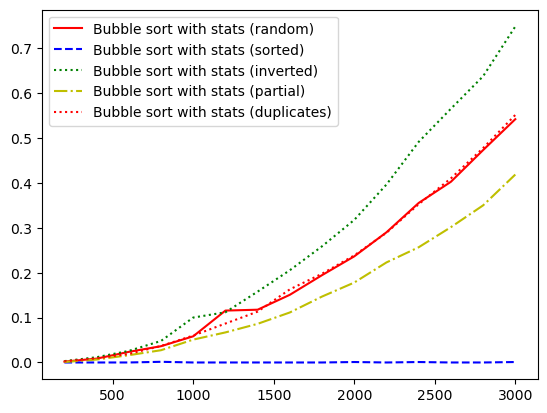

In [15]:
executerTri(bubble_sort_with_stats,'r','Bubble sort with stats')

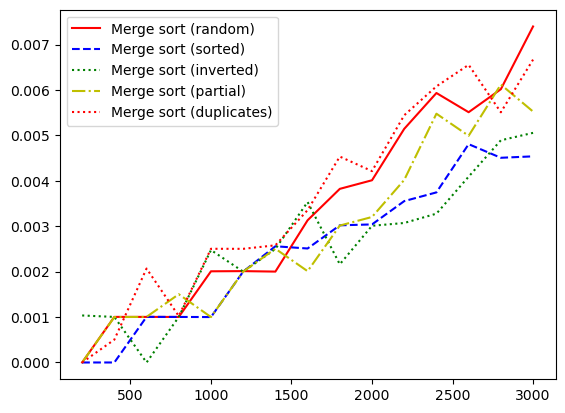

In [16]:
executerTri(merge_sort_with_stats, 'r', 'Merge sort')

Sur la figure précédente

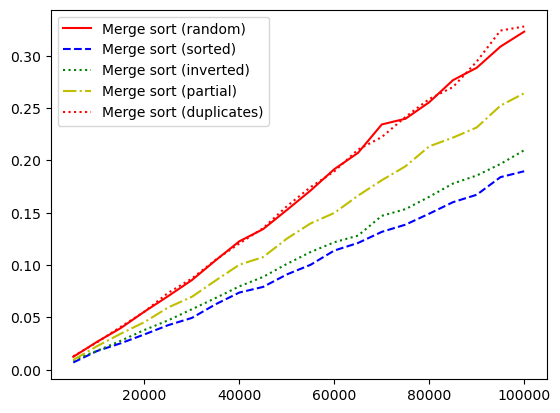

In [17]:
executerTri(merge_sort_with_stats, 'r', 'Merge sort',20,5000)

## Tri à bulles

### Pire cas
Pour un tableau de taille $n$, le tri à bulles compare chaque élément avec tous les autres éléments qui le suivent. Pour le pire cas, c'est-à-dire un tableau trié de manière décroissante, chaque élément doit être comparé et échangé avec tous les éléments suivants pour atteindre sa position correcte.

Imaginons un tableau de taille $n$ où les éléments sont triés dans l'ordre décroissant. Le tri à bulles va procéder de la manière suivante :

1. **Première passe** : Le plus grand élément (qui est à la première position) va être comparé avec chaque élément suivant et échangé jusqu'à atteindre la dernière position. Cela nécessite $(n-1)$ comparaisons et $(n-1)$ permutations.
2. **Deuxième passe** : Le deuxième plus grand élément va être comparé avec chaque élément suivant et échangé jusqu'à atteindre l'avant-dernière position. Cela nécessite $(n-2)$ comparaisons et $(n-2)$ permutations.
3. **Troisième passe** : Le troisième plus grand élément va être comparé avec chaque élément suivant et échangé jusqu'à atteindre la troisième position à partir de la fin. Cela nécessite $(n-3)$ comparaisons et $(n-3)$ permutations.

Ce processus continue jusqu'à ce que tous les éléments soient triés. 

Le nombre total de permutations (ou échanges) dans ce cas est la somme des premiers $(n-1)$ entiers.

Ainsi, le nombre total de permutations dans le pire cas pour le tri à bulles est donné par :

$$
N_{permutations} = \sum_{i=1}^{n-1} i = \frac{(n-1) \cdot n}{2}
$$

C'est donc une complexité quadratique :

$$
O(n) = n^2
$$


### Meilleur cas

Le tri à bulle parcours simplement la liste une seule fois et fait donc $n-1$ comparaisons et 0 permutations. 

Donc on peut dire qu'il s'agit d'une lecture de liste. Soit une compléxité $O(n)$

### Cas Moyen

Le cas moyen de permutations pour le tri à bulles est de $\frac{n^2}{4}$. Et l'on peut le vérifier expérimentalement. ()


In [18]:
def calculer_cas_moyen(fct_tri, type_donnees='random', nlist=15, nval=200):
    operations = []
    tailles = []

    operations_par_taille = [0] * nlist

    # Création des tableaux
    taille_tableaux, listDataRandom, listDataSorted, listDataInvertedSorted, listDataPartiallySorted, listDataWithDuplicates = create_data(nlist, nval)
    dataTest = {
        'random': listDataRandom,
        'sorted': listDataSorted,
        'inverted': listDataInvertedSorted,
        'partial': listDataPartiallySorted,
        'duplicates': listDataWithDuplicates
    }

    for i, data in enumerate(dataTest[type_donnees]):
        _,_, ops = fct_tri(data)
        operations_par_taille[i] += ops

    operations_par_taille = [ops for ops in operations_par_taille]
    # Courbe théorique n^2/4
    operations_theoriques = [(n**2)/4 for n in taille_tableaux]
    plt.plot(taille_tableaux, operations_theoriques, label='n^2/4', linestyle='--')

    plt.plot(taille_tableaux, operations_par_taille, label='Tri à bulles',linestyle=':', marker='+')
    plt.xlabel('Taille du tableau')
    plt.title('Nombre de permutations par taille de tableau')

    plt.legend()

    plt.grid(True, linestyle='--')

    plt.title('Nombre de permutations par taille de tableau')
    plt.legend()
    plt.grid(True)
    plt.show()

    return operations_par_taille

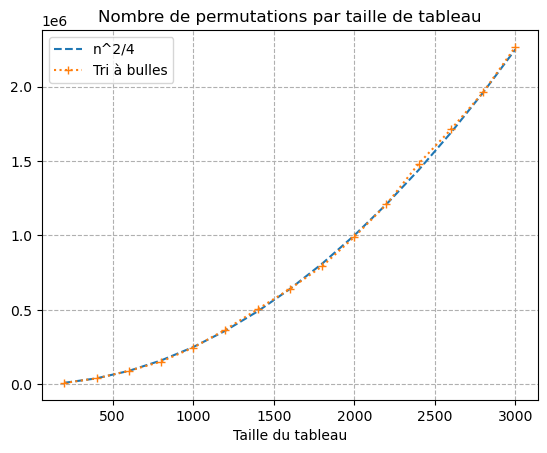

Cas moyen pour bubble_sort: [9194, 39950, 90133, 152059, 246714, 367298, 504616, 640317, 792467, 989519, 1209111, 1482455, 1712072, 1961096, 2266571]


In [19]:
# Exemple d'utilisation avec bubble_sort
cas_moyen_bubble_sort = calculer_cas_moyen(bubble_sort_with_stats, type_donnees='random')

print(f"Cas moyen pour bubble_sort: {cas_moyen_bubble_sort}")

Dans les données juste au dessus, on constate que la courbe bleue théorique du nombre de permutations coïncide avec l'exécution du tri dans le cas moyen.


## Tri par insertion

### Pire cas

Le pire cas pour le tri par insertion se produit lorsque le tableau est trié dans l'ordre décroissant. Dans ce cas, chaque nouvel élément doit être comparé avec tous les éléments de la sous-liste triée et déplacé à la première position. Cela nécessite un nombre maximal de comparaisons et de permutations.

1. **Première passe** : Le deuxième élément est comparé avec le premier et déplacé devant lui. Cela nécessite 1 comparaison et 1 permutation.
2. **Deuxième passe** : Le troisième élément est comparé avec les deux premiers et déplacé devant eux. Cela nécessite 2 comparaisons et 2 permutations.
3. **Troisième passe** : Le quatrième élément est comparé avec les trois premiers et déplacé devant eux. Cela nécessite 3 comparaisons et 3 permutations.

Ce processus continue jusqu'à ce que tous les éléments soient triés.

Le nombre total de comparaisons et de permutations dans ce cas est la somme des premiers $(n-1)$ entiers.

Ainsi, le nombre total de comparaisons et de permutations dans le pire cas pour le tri par insertion est donné par :

$$
N_{comparaisons} = N_{permutations} = \sum_{i=1}^{n-1} i = \frac{(n-1) \cdot n}{2}
$$

C'est donc une complexité quadratique :

$$
O(n) = n^2
$$

### Meilleur cas

Le meilleur cas pour le tri par insertion se produit lorsque le tableau est déjà trié dans l'ordre croissant. Dans ce cas, chaque nouvel élément est comparé avec le dernier élément de la sous-liste triée et inséré directement après lui. Cela nécessite un nombre minimal de comparaisons et aucune permutation.

1. **Première passe** : Le deuxième élément est comparé avec le premier et inséré après lui. Cela nécessite 1 comparaison et 0 permutations.
2. **Deuxième passe** : Le troisième élément est comparé avec le deuxième et inséré après lui. Cela nécessite 1 comparaison et 0 permutations.
3. **Troisième passe** : Le quatrième élément est comparé avec le troisième et inséré après lui. Cela nécessite 1 comparaison et 0 permutations.

Ce processus continue jusqu'à ce que tous les éléments soient triés.

Le nombre total de comparaisons dans ce cas est $(n-1)$ et le nombre total de permutations est 0.

Ainsi, le nombre total de comparaisons et de permutations dans le meilleur cas pour le tri par insertion est donné par :

$$
N_{comparaisons} = n-1
$$

C'est donc une complexité linéaire :

$$
O(n) = n
$$

### Cas moyen

Le cas moyen pour le tri par insertion se produit lorsque les éléments du tableau sont dans un ordre aléatoire. En moyenne, chaque nouvel élément doit être comparé avec la moitié des éléments de la sous-liste triée et déplacé à sa position correcte.

Le nombre total de comparaisons et de permutations dans ce cas est donné par :

$$
N_{comparaisons} = N_{permutations} \approx \frac{(n-1) \cdot n}{4}
$$

C'est donc une complexité quadratique :

$$
O(n) = n^2
$$

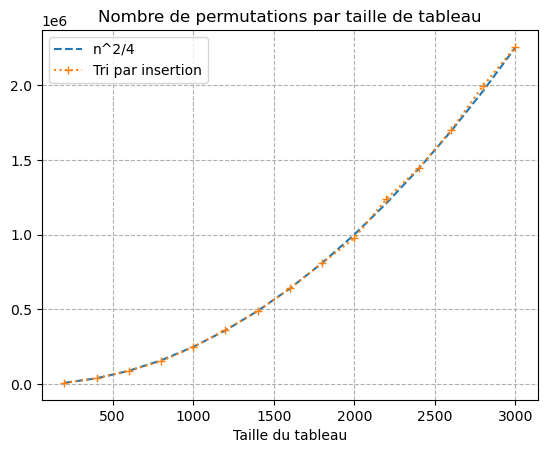

Cas moyen pour bubble_sort: [9182, 40789, 90423, 154017, 248163, 365187, 488150, 640233, 808596, 976222, 1238720, 1443054, 1696213, 1994790, 2254290]


In [20]:
cas_moyen_insertion_sort = calculer_cas_moyen_tri_insertion(bubble_sort_with_stats, type_donnees='random')

print(f"Cas moyen pour bubble_sort: {cas_moyen_insertion_sort}")

De même que pour le tri à bulle, les nombre de permutations suit $\frac{n^2}{4}$


## Tri par sélection

### Meilleur Cas
Le meilleur cas pour le tri par sélection se produit également lorsque le tableau est déjà trié dans l'ordre croissant. Cependant, contrairement au tri par insertion, le tri par sélection ne bénéficie pas de cette situation car il continue à effectuer des comparaisons pour chaque élément.

**Complexité:** $O(n^2)$

### Pire Cas
Le pire cas pour le tri par sélection se produit lorsque le tableau est trié dans l'ordre décroissant. Comme pour le meilleur cas, le tri par sélection effectue le même nombre de comparaisons indépendamment de l'ordre initial des éléments.

**Complexité:** $O(n^2)$

### Cas Moyen
Le cas moyen pour le tri par sélection se produit lorsque les éléments du tableau sont dans un ordre aléatoire. Le nombre de comparaisons reste le même, car chaque élément est comparé avec tous les autres éléments restants.

**Complexité:** $O(n^2)$

### Comparaison avec le tri par insertion
- **Meilleur Cas:** Le tri par insertion est plus efficace ($O(n)$) que le tri par sélection ($O(n^2)$) lorsque le tableau est déjà trié.
- **Pire Cas:** Les deux algorithmes ont une complexité quadratique ($O(n^2)$) dans le pire cas.
- **Cas Moyen:** Les deux algorithmes ont également une complexité quadratique ($O(n^2)$) en moyenne.

En résumé, le tri par insertion peut être plus performant que le tri par sélection dans des situations où le tableau est déjà partiellement trié, mais dans le pire et le cas moyen, les deux algorithmes ont des performances similaires.

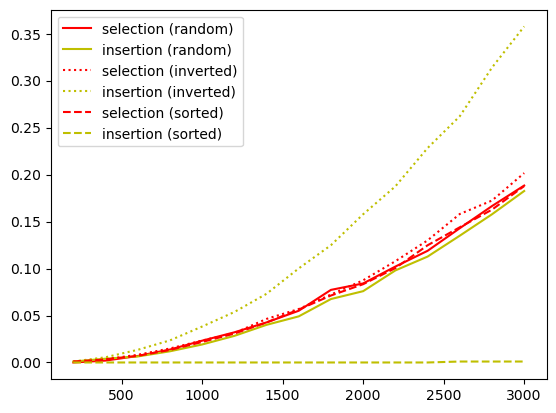

In [21]:
executerTriConcurrence([selection_sort,insertion_sort], ['selection','insertion'], ['r', 'y', 'g', 'b'], nlist=15, nval=200, surplace=True, liste=['random', 'inverted', 'sorted'])

D'après la figure précédente, on constate un avantage pour le tri par sélection dans le pire des cas, contrairement à ce qui a été affirmé précédemment il existe bien une différence dans le pire cas. 

La raison est assez simple, le nombre de comparaisons est certe le même mais, le tri par insertion nécessite beaucoup plus de permutations que le tri par sélection. Dans le pire des cas, chaque élément doit être déplacé à travers une grande partie de la liste.


## Merge Sort

### Pire cas

Le tri par fusion fonctionne en divisant récursivement un tableau en deux moitiés jusqu'à ce que chaque sous-tableau contienne un seul élément, puis en fusionnant les sous-tableaux triés. Le pire cas pour le tri fusion est le même que pour le meilleur cas, car le tri fusion divise toujours le tableau en moitiés égales, peu importe l'ordre initial des éléments.

Imaginons un tableau de taille $n$. Le tri par fusion suit une stratégie **diviser pour régner** :

1. **Diviser** : Le tableau est divisé en deux sous-tableaux de taille $\frac{n}{2}$, puis chaque sous-tableau est à nouveau divisé en deux, et ainsi de suite, jusqu'à ce que les sous-tableaux ne contiennent plus qu'un élément.
2. **Fusionner** : Une fois les sous-tableaux de taille 1 obtenus, ils sont fusionnés deux à deux en comparant les éléments et en les insérant dans le bon ordre.

À chaque étape de fusion, il y a $\log n$ divisions, car le tableau est divisé de manière répétée par deux. Chaque étape de fusion nécessite de comparer tous les éléments d'un sous-tableau avec ceux de l'autre sous-tableau, ce qui prend $O(n)$ opérations.

Ainsi, la complexité du tri fusion est donnée par :

$$
O(n \log n)
$$

Cela s'explique par les $\log n$ niveaux de récursion (correspondant aux divisions successives du tableau), et chaque niveau effectuant $n$ comparaisons pour fusionner les sous-tableaux.

### Meilleur cas

Le meilleur cas pour le tri par fusion est également $O(n \log n)$, car peu importe l'ordre des éléments initiaux (qu'ils soient déjà triés ou non), le tri fusion divisera toujours le tableau de la même manière et effectuera le même nombre de comparaisons et de fusions.

### Cas moyen

Dans le cas moyen, le tri par fusion aura également une complexité de $O(n \log n)$, car le processus de division et de fusion ne dépend pas de l'ordre initial du tableau. Chaque fusion nécessite de comparer les éléments et de les réarranger de manière similaire, qu'il s'agisse d'un tableau aléatoire ou partiellement trié.

### Comparaison avec d'autres algorithmes

Contrairement à des algorithmes comme le tri à bulles ou le tri par insertion, dont le pire cas est quadratique $O(n^2)$, le tri fusion garantit une complexité logarithmique même dans le pire cas. C'est ce qui en fait un algorithme très efficace pour les grands ensembles de données, bien qu'il nécessite plus de mémoire (espace supplémentaire pour stocker les sous-tableaux).

### Mémoire supplémentaire

Le tri par fusion nécessite de l'espace supplémentaire pour stocker les sous-tableaux lors des opérations de fusion. Cela donne une complexité en espace de $O(n)$, ce qui est un facteur à considérer pour des grandes structures de données.

Ainsi, en résumé :

- **Complexité dans tous les cas** : $O(n \log n)$
- **Espace supplémentaire requis** : $O(n)$

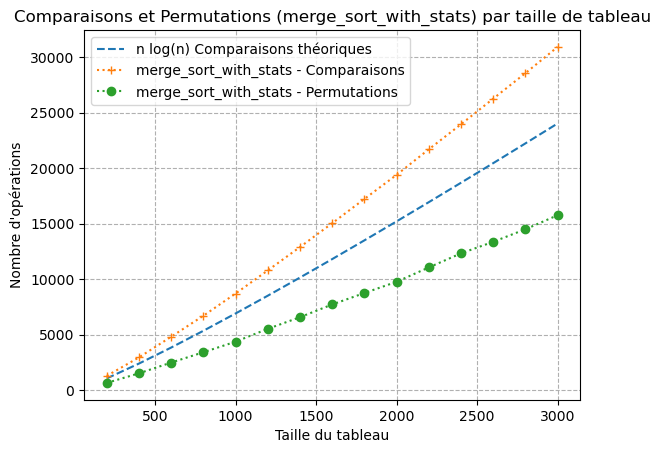

Cas moyen pour merge_sort: ([1286, 2950, 4811, 6702, 8702, 10784, 12889, 15035, 17220, 19391, 21691, 23944, 26252, 28547, 30912], [656, 1518, 2487, 3416, 4367, 5524, 6573, 7719, 8749, 9761, 11054, 12323, 13362, 14492, 15756])


In [22]:
cas_moyen_merge_sort = calculer_cas_moyen_avec_stats(merge_sort_with_stats, type_donnees='random')

print(f"Cas moyen pour merge_sort: {cas_moyen_merge_sort}")

## Tri rapide (Quick Sort)

Le tri rapide (Quick Sort) est un algorithme de tri diviser-pour-régner, utilisant une stratégie récursive. Il fonctionne en sélectionnant un pivot, en partitionnant les éléments autour de ce pivot, et en triant récursivement les sous-listes résultantes. Le tri rapide est célèbre pour son efficacité pratique, malgré un pire cas théorique défavorable.

### Pire cas

Le pire cas du tri rapide survient lorsque l'algorithme choisit systématiquement un mauvais pivot, c'est-à-dire un pivot qui divise mal la liste à chaque étape. Cela peut se produire, par exemple, si le pivot choisi est toujours l'élément le plus grand ou le plus petit de la liste. Dans ce cas, l'algorithme n'arrive pas à réduire significativement la taille des sous-listes et effectue des partitions déséquilibrées.

Dans ce scénario, le nombre de comparaisons sera maximum, car la division du tableau ne réduira que d'un élément à chaque étape. Le nombre total de comparaisons est alors équivalent à celui du tri par insertion ou par sélection, avec une complexité quadratique.

Pour un tableau de taille \(n\), dans le pire cas, le tri rapide effectuera :

$$
C_{pire} = \frac{n(n-1)}{2}
$$

Ce qui donne une complexité en :

$$
O(n^2)
$$

Le pire cas est rare en pratique, surtout si des techniques comme le pivot médian ou une sélection aléatoire de pivot sont utilisées.

### Meilleur cas

Dans le meilleur cas, le pivot choisi divise la liste en deux sous-listes de taille à peu près égale à chaque étape. Dans ce cas, l'algorithme parvient à réduire efficacement la taille des sous-listes à chaque récursion.

Le nombre total de comparaisons dans ce cas est proportionnel à :

$$
C_{meilleur} = n \log n
$$

La complexité dans le meilleur cas est donc en :

$$
O(n \log n)
$$

### Cas moyen

Le cas moyen du tri rapide intervient lorsque les sous-listes formées après la partition sont relativement équilibrées à chaque itération, mais sans être parfaitement égales. Cela représente la plupart des scénarios réels avec des données aléatoires.

Pour un tableau de taille \(n\), le nombre moyen de comparaisons effectuées par le tri rapide est donné par :

$$
C_{moyen} = 2n \log n
$$

Ce qui conduit à une complexité moyenne également en :

$$
O(n \log n)
$$

### Comparaisons et permutations

- **Comparaisons** : Le tri rapide effectue beaucoup de comparaisons pour placer correctement les éléments autour du pivot. Dans le cas moyen, ces comparaisons sont de l'ordre de $n \log n$.
- **Permutations** : Les permutations sont généralement moins fréquentes que les comparaisons, car elles ne se produisent que lorsque deux éléments doivent être échangés. Cela fait du tri rapide un algorithme très performant dans les cas moyens et meilleurs.

### Conclusion

Le tri rapide est très apprécié pour sa rapidité en pratique, même si son pire cas théorique est moins bon que celui du tri par fusion. Grâce à sa complexité moyenne en $O(n \log n)$, il est souvent préféré pour le tri en mémoire, et des optimisations peuvent rendre son pire cas improbable.

En résumé :

- **Pire cas** : $O(n \log n)$
- **Meilleur cas** : $O(n \log n)$
- **Cas moyen** : $O(n \log n)$

Grâce à sa flexibilité et à ses performances moyennes, le tri rapide est largement utilisé dans les bibliothèques de tri standard.

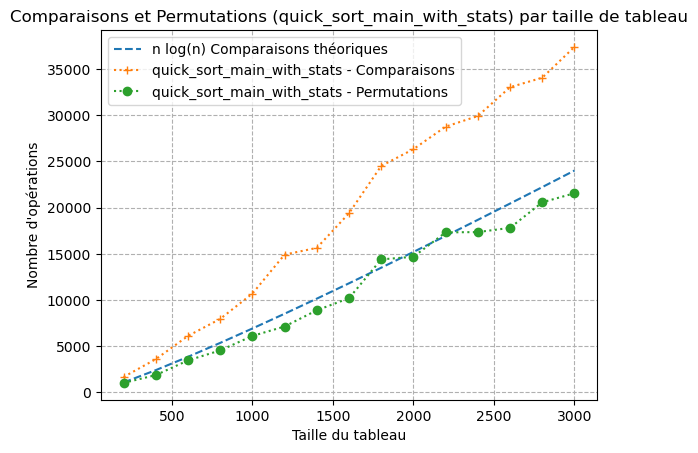

Cas moyen pour quick_sort: ([1656, 3583, 6100, 7947, 10690, 14912, 15641, 19395, 24518, 26336, 28774, 29926, 33048, 34076, 37412], [1013, 1859, 3449, 4533, 6101, 7125, 8881, 10189, 14395, 14679, 17321, 17354, 17811, 20577, 21560])


In [23]:
cas_moyen_quick_sort = calculer_cas_moyen_avec_stats(quick_sort_main_with_stats, type_donnees='random')

print(f"Cas moyen pour quick_sort: {cas_moyen_quick_sort}")

## Tri par tas (Heap Sort)

Le **Heap Sort** (ou tri par tas) est un algorithme de tri basé sur une structure de données appelée tas binaire (ou heap). Il construit un tas maximum à partir de la liste, ce qui permet de retirer successivement le plus grand élément du tas et de le placer à la bonne position dans le tableau trié. Il combine des propriétés d’un tas et d’un tri par sélection pour assurer un tri efficace en termes de temps et d’espace.

### Pire cas

Dans le pire cas, comme pour la plupart des algorithmes de tri basés sur des comparaisons, le **Heap Sort** a une complexité en $O(n \log n)$. Cela est dû à la nécessité de réarranger le tas à chaque suppression d’élément pour maintenir sa structure.

Le processus de tri peut être décomposé en deux étapes :

1. **Construction du tas** : Cette étape construit un tas binaire à partir du tableau initial. La complexité de cette opération est en $O(n \log n)$.
2. **Extraction des éléments** : Pour chaque élément, le plus grand élément (la racine du tas) est extrait, puis le tas est réarrangé pour restaurer la propriété de tas. Comme la hauteur du tas est $O(n \log n)$, réorganiser le tas après chaque extraction nécessite $O(n \log n)$ opérations. Extraire tous les éléments prend donc un temps total de $O(n \log n)$.

En résumé, même dans le pire cas, la complexité du **Heap Sort** reste en $O(n \log n)$, ce qui est un avantage par rapport à d'autres algorithmes comme le **Quick Sort** dans leur pire cas.

### Meilleur cas

Le meilleur cas du **Heap Sort** est similaire au pire cas, car il n’y a pas de scénario où l'algorithme peut fonctionner de manière significativement plus rapide. La structure du tas doit toujours être réarrangée après chaque extraction, et cela implique toujours une complexité logarithmique pour chaque extraction.

Le meilleur cas a donc également une complexité en $O(n \log n)$.

### Cas moyen

Comme pour le meilleur et le pire cas, le cas moyen du **Heap Sort** reste en $O(n \log n)$. La structure d’un tas ne permet pas de tirer parti de cas où le tableau est partiellement trié, contrairement au **Quick Sort** qui peut être plus rapide sur des tableaux déjà en ordre.

### Comparaisons et permutations

- **Comparaisons** : Le nombre de comparaisons dans le **Heap Sort** dépend de la nécessité de maintenir la structure du tas. À chaque extraction de l’élément maximum (ou minimum), il faut comparer et potentiellement échanger les éléments pour rétablir la propriété du tas. Cela entraîne un nombre total de comparaisons qui est de l’ordre de $O(n \log n)$.
  
- **Permutations** : Les permutations se produisent lorsque deux éléments doivent être échangés dans le tas pour maintenir sa structure. Comme pour les comparaisons, le nombre total de permutations est de l'ordre de $O(n \log n)$.

### Conclusion

Le **Heap Sort** est un algorithme très stable en termes de complexité, avec $O(n \log n)$ dans le pire, le meilleur, et le cas moyen. Bien que son nombre de permutations et de comparaisons soit également de l’ordre de $O(n \log n)$, il tend à être moins performant que le **Quick Sort** en pratique, à cause de la surcharge liée au maintien de la structure du tas.

En résumé :

- **Pire cas** : $O(n \log n)$
- **Meilleur cas** : $O(n \log n)$
- **Cas moyen** : $O(n \log n)$

Le **Heap Sort** reste un excellent choix lorsqu'une complexité en $O(n \log n)$ est garantie indépendamment de la disposition des données en entrée, surtout dans les cas où la mémoire est une ressource critique, car il utilise une quantité constante d’espace auxiliaire.

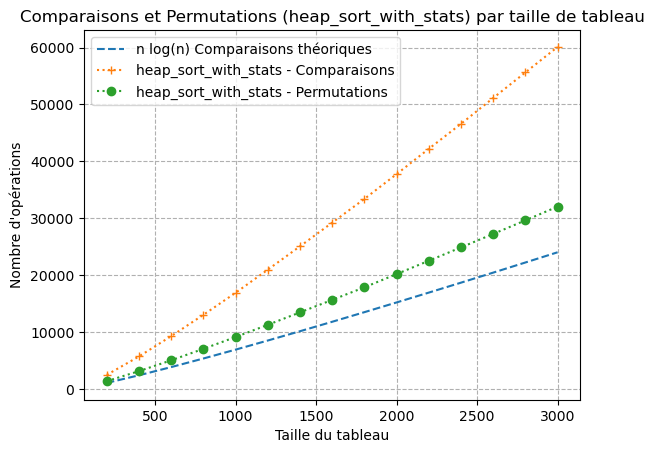

Cas moyen pour heap_sort: ([2471, 5704, 9271, 13022, 16891, 20957, 25061, 29219, 33393, 37752, 42199, 46588, 51134, 55626, 60108], [1367, 3126, 5031, 7045, 9123, 11263, 13455, 15651, 17859, 20184, 22525, 24874, 27241, 29630, 32043])


In [24]:
cas_moyen_heap_sort = calculer_cas_moyen_avec_stats(heap_sort_with_stats, type_donnees='random')

print(f"Cas moyen pour heap_sort: {cas_moyen_heap_sort}")

# Comparaisons des Algorithmes de tri

## Les algorithmes de compléxité quadratique

Pour comparer ce qui est comparable, mettons en concurrence des algorithmes à la compléxité similaire

In [28]:
executerTriConcurrence([selection_sort,bubble_sort_optimized,insertion_sort], ['Tri par sélection','Tri à bulles','Tri par insertion'], ['r', 'y', 'g', 'b'], nlist=15, nval=200, surplace=True, liste=['random', 'inverted', 'sorted'])

NameError: name 'bubble_sort_optimized' is not defined

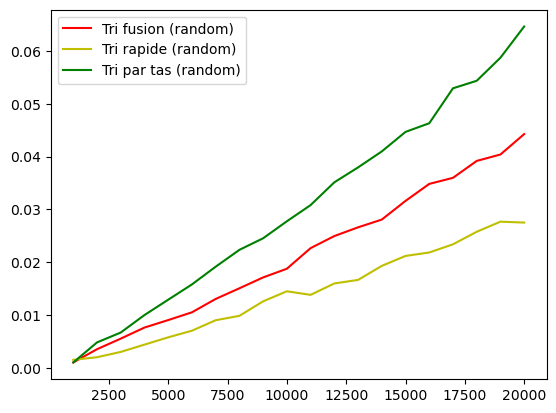

In [26]:
executerTriConcurrence([merge_sort,quick_sort,heap_sort], ['Tri fusion','Tri rapide','Tri par tas'], ['r', 'y', 'g', 'b'], nlist=20, nval=1000, surplace=True, liste=['random'])

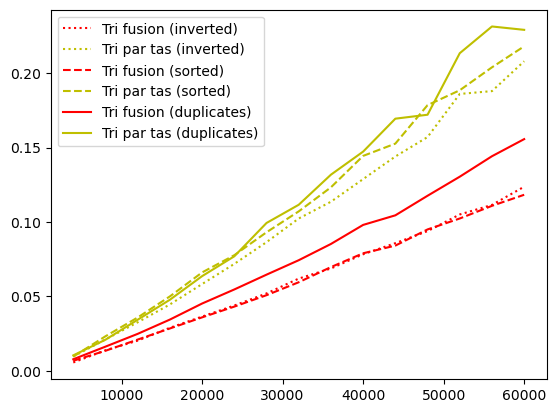

In [27]:
executerTriConcurrence([merge_sort,heap_sort], ['Tri fusion','Tri par tas'], ['r', 'y', 'g', 'b'], nlist=15, nval=4000, surplace=True, liste=['inverted', 'sorted','duplicates'])

In [29]:
executerTriConcurrence([merge_sort,quick_sort,heap_sort,selection_sort,bubble_sort_optimized,insertion_sort], ['Tri fusion','Tri rapide','Tri par tas','Tri par sélection','Tri à bulles','Tri par insertion'], nlist=8, nval=300, surplace=True, liste=['random'])

NameError: name 'bubble_sort_optimized' is not defined

In [30]:
executerTriConcurrence([merge_sort,quick_sort,heap_sort,selection_sort,bubble_sort_optimized,insertion_sort], ['Tri fusion','Tri rapide','Tri par tas','Tri par sélection','Tri à bulles','Tri par insertion'], nlist=8, nval=300, surplace=True, liste=['inverted'])

NameError: name 'bubble_sort_optimized' is not defined

In [31]:
executerTriConcurrence([merge_sort,quick_sort,heap_sort,selection_sort,bubble_sort_optimized,insertion_sort], ['Tri fusion','Tri rapide','Tri par tas','Tri par sélection','Tri à bulles','Tri par insertion'], nlist=8, nval=300, surplace=True, liste=['sorted'])

NameError: name 'bubble_sort_optimized' is not defined

In [32]:
# Comparaison des algorithmes de tri sur des tableaux triés
executerTriConcurrence(
    [insertion_sort, bubble_sort, quick_sort],
    ['Tri par insertion', 'Tri à bulles', 'Tri rapide'],
    ['g', 'r', 'b'],
    nlist=15,
    nval=200,
    surplace=True,
    liste=['sorted']
)

# Comparaison des algorithmes de tri sur des tableaux inversés
executerTriConcurrence(
    [quick_sort, bubble_sort, insertion_sort],
    ['Tri rapide', 'Tri à bulles', 'Tri par insertion'],
    ['b', 'r', 'g'],
    nlist=15,
    nval=200,
    surplace=True,
    liste=['inverted']
)

# Comparaison des algorithmes de tri sur des tableaux aléatoires
executerTriConcurrence(
    [quick_sort, bubble_sort, insertion_sort],
    ['Tri rapide', 'Tri à bulles', 'Tri par insertion'],
    ['b', 'r', 'g'],
    nlist=15,
    nval=200,
    surplace=True,
    liste=['random']
)

NameError: name 'bubble_sort' is not defined

## Classement des Algorithmes de Tri

| Type de Tableau | Algorithme le Plus Rapide | Algorithme le Plus Lent |
|-----------------|---------------------------|-------------------------|
| Trié            | Insertion Sort            | Bubble Sort             |
| Inversé         | Quick Sort                | Bubble Sort             |
| Aléatoire       | Quick Sort                | Bubble Sort             |

### Remarques
- **Trié**: Les algorithmes de tri par insertion sont généralement très efficaces sur des tableaux déjà triés.
- **Inversé**: Les algorithmes de tri rapide sont souvent les plus performants sur des tableaux inversés.
- **Aléatoire**: Le tri rapide est souvent le plus performant sur des tableaux aléatoires, tandis que le tri à bulles est généralement le plus lent.

## Conclusion

### Analyse des Algorithmes de Tri

L'étude comparative des six algorithmes de tri (tri par sélection, tri à bulles, tri par insertion, tri fusion, tri rapide, et tri par tas) nous a permis de mettre en évidence leurs performances respectives selon différents types de données d'entrée.

1. **Tri par Sélection**:
    - **Avantages**: Simple à comprendre et à implémenter.
    - **Inconvénients**: Inefficace pour les grandes listes en raison de sa complexité en $O(n^2)$.

2. **Tri à Bulles**:
    - **Avantages**: Facile à implémenter et à optimiser légèrement.
    - **Inconvénients**: Très inefficace pour les grandes listes, même avec des optimisations, en raison de sa complexité en $O(n^2)$.

3. **Tri par Insertion**:
    - **Avantages**: Très efficace pour les petites listes ou les listes presque triées.
    - **Inconvénients**: Inefficace pour les grandes listes non triées, avec une complexité en $O(n^2)$ dans le pire des cas.

4. **Tri Fusion**:
    - **Avantages**: Efficace pour les grandes listes, avec une complexité en $O(n \log n)$. Stable et bien adapté aux données volumineuses.
    - **Inconvénients**: Utilise de l'espace supplémentaire pour les listes temporaires.

5. **Tri Rapide**:
    - **Avantages**: Très efficace pour les grandes listes, avec une complexité moyenne en $O(n \log n)$. Généralement plus rapide que le tri fusion en pratique.
    - **Inconvénients**: Complexité en $O(n^2)$ dans le pire des cas, bien que cela puisse être atténué par des techniques comme le pivot aléatoire.

6. **Tri par Tas**:
    - **Avantages**: Efficace pour les grandes listes, avec une complexité en $O(n \log n)$. Utilise un espace constant.
    - **Inconvénients**: Moins efficace que le tri rapide en pratique en raison des opérations de tas.

### Recommandations

- Pour des listes petites ou presque triées, le **tri par insertion** est souvent le plus performant.
- Pour des listes de taille moyenne à grande, le **tri rapide** est généralement le meilleur choix, sauf si la stabilité est requise, auquel cas le **tri fusion** est préférable.
- Le **tri par tas** est une bonne alternative lorsque l'utilisation de mémoire supplémentaire est une contrainte.

En conclusion, le choix de l'algorithme de tri dépend fortement de la nature des données et des contraintes spécifiques de l'application. Une compréhension approfondie des caractéristiques de chaque algorithme permet de faire des choix éclairés pour optimiser les performances.
### Ce que l'on peut en retenir concernant la complexité

- **Algorithmes à complexité quadratique ($O(n^2)$)**:
    - **Tri par sélection, tri à bulles, tri par insertion**: Ces algorithmes sont simples à comprendre et à implémenter, mais deviennent inefficaces pour les grandes listes. Ils sont plus adaptés aux petites listes ou aux listes presque triées.

- **Algorithmes à complexité logarithmique ($O(n \log n)$)**:
    - **Tri fusion, tri rapide, tri par tas**: Ces algorithmes sont plus efficaces pour les grandes listes. Le tri rapide est généralement le plus performant en pratique, bien que le tri fusion soit préféré lorsque la stabilité est requise. Le tri par tas est une bonne alternative lorsque l'utilisation de mémoire supplémentaire est une contrainte.

En résumé, pour optimiser les performances, il est crucial de choisir l'algorithme de tri en fonction de la taille des données et des exigences spécifiques de l'application.